<a href="https://colab.research.google.com/github/anujushir/My-Projects-ML-DL-and-NLP-/blob/main/Patient_Health_Risk_Segmentation_Using_Insurance_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Unzip uploaded archive
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("insurance_data")

# Load dataset
df = pd.read_csv("insurance_data/insurance.csv")
df.head(25)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   object  
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   object  
 5   region    1338 non-null   object  
 6   charges   1338 non-null   float64 
 7   risk      1338 non-null   category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 74.7+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000


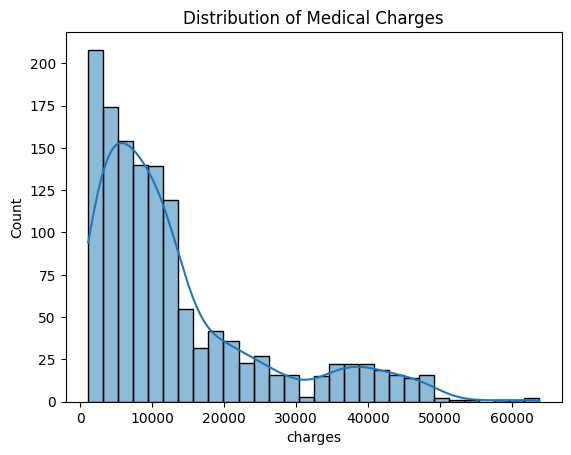

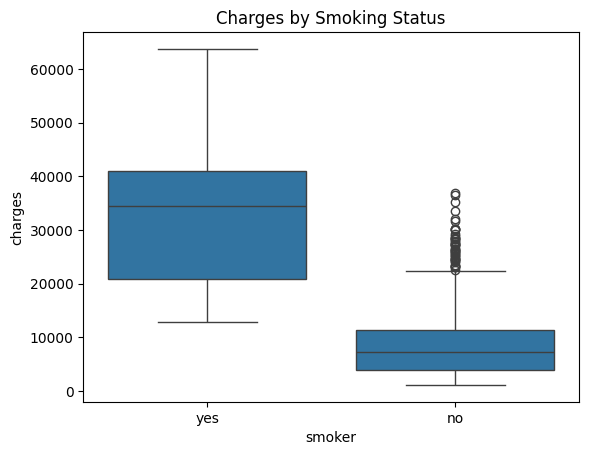

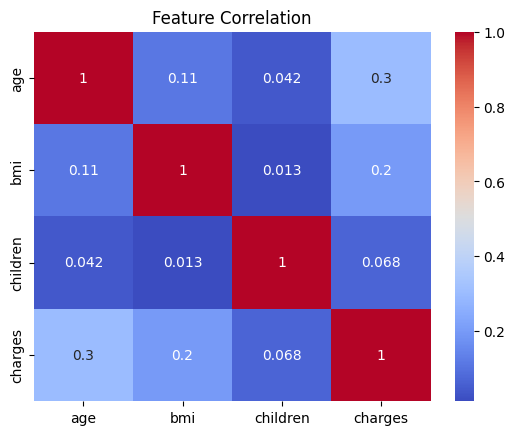

In [ ]:
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize cost distribution
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Medical Charges")
plt.show()
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoking Status")
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [ ]:
# Categorize patients into risk based on charges
df['risk'] = pd.qcut(df['charges'], q=3, labels=["Low", "Medium", "High"])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df.drop(columns=['charges', 'risk']), drop_first=True)

# Target variable
y = df['risk']
X = df_encoded


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 68   6  10]
 [  1 100   4]
 [  3   3  73]]
              precision    recall  f1-score   support

        High       0.94      0.81      0.87        84
         Low       0.92      0.95      0.93       105
      Medium       0.84      0.92      0.88        79

    accuracy                           0.90       268
   macro avg       0.90      0.90      0.90       268
weighted avg       0.90      0.90      0.90       268



| True \ Pred | High | Low | Medium |
| ----------- | ---- | --- | ------ |
| High        | 68   | 6   | 10     |
| Low         | 1    | 100 | 4      |
| Medium      | 3    | 3   | 73     |


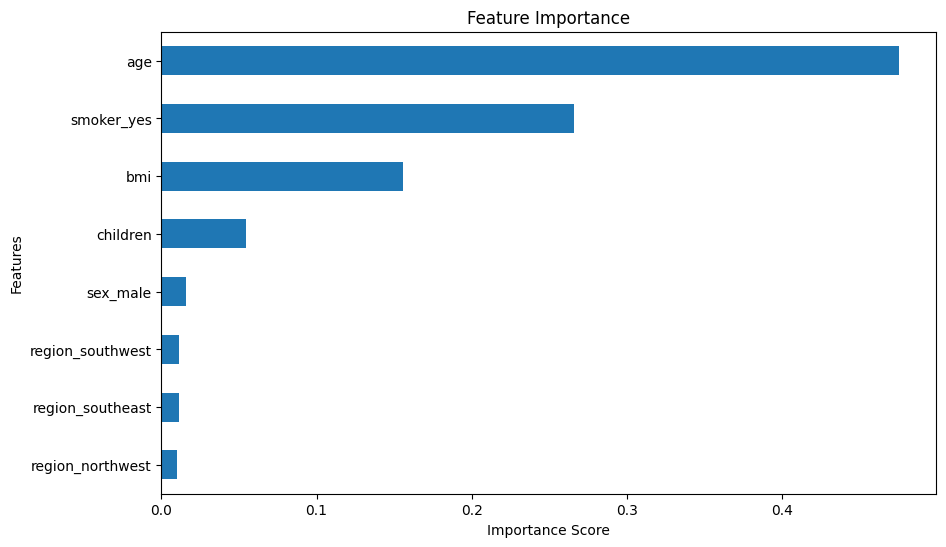

In [ ]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


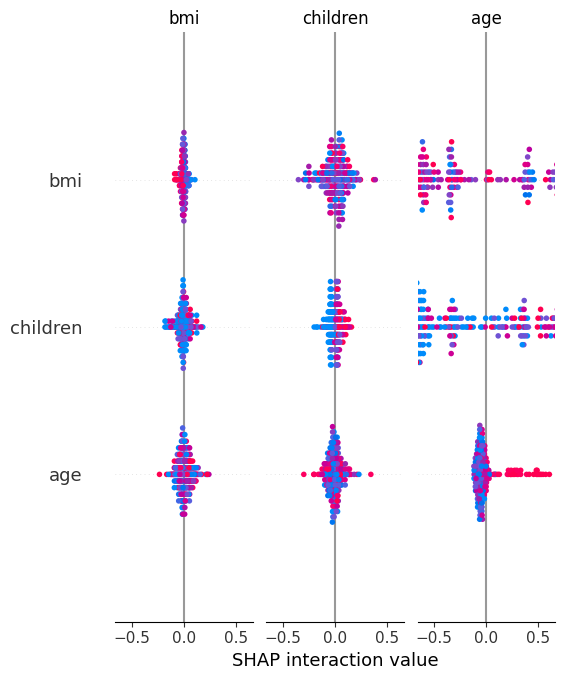

In [ ]:
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
